# mean shift Clustering

https://spin.atomicobject.com/2015/05/26/mean-shift-clustering/

장점
* The entire end result is controlled by one parameter—the kernel bandwidth value. 
* Mean shift cleverly exploits the density of the points in an attempt to generate a reasonable number of clusters.

단점
* The most glaring disadvantage is its slowness. More specifically, it is an N squared algorithm. 
* while it is slow, it is also embarrassingly parallelizable, as each point could be shifted in parallel with every other point.

## Implementing mean-shift

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html

In [ ]:
'''
def shift(p, original_points):
    shift_x = float(0)
    shift_y = float(0)
    scale_factor = float(0)
    for p_temp in original_points:
        # numerator
        dist = euclidean_dist(p, p_temp)
        weight = kernel(dist, kernel_bandwidth)
        shift_x += p_temp[0] * weight
        shift_y += p_temp[1] * weight
        # denominator
        scale_factor += weight
    shift_x = shift_x / scale_factor
    shift_y = shift_y / scale_factor
    return [shift_x, shift_y]
'''

In [ ]:
'''
for p in copied_points:
    while not at_kde_peak:
        p = shift(p, original_points)
'''

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import io
from PIL import Image
from PIL import ImageEnhance
import colorsys

def centroid_histogram(clt):
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)
    hist = hist.astype("float")
    hist /= hist.sum()
    return hist


def plot_colors(hist, centroids):
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0
    for (percent, color) in zip(hist, centroids):
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),color.astype("uint8").tolist(), -1)
#         print('startx:',startX,'endX:',endX)
        startX = endX
    return bar

def revised_rgb_to_hsv(r, g, b):
    (h, s, v) = colorsys.rgb_to_hsv(r/255, g/255, b/255)
    h *= 360
    s *= 100
    v *= 100
    return h, s, v

In [2]:
import pandas as pd
df=pd.read_excel("finalcoding.xlsx")
df

,작가,제목,h1,s1,v1,h2,s2,v2,h3,s3,v3,이미지url
0,William-Adolphe Bouguereau,A Young Girl Defending Herself against Eros (a...,29,31,42,32,1,72,49,57,17,https://artvee.com/saconud/203137fg.jpg
1,William-Adolphe Bouguereau,Le Jour Des Morts (All Saints Day),31,29,16,49,9,75,37,23,50,https://artvee.com/saconud/206314fg.jpg
2,William-Adolphe Bouguereau,Prêtresse De Bacchus (1894),38,19,58,31,4,89,49,36,31,https://artvee.com/saconud/400938mt.jpg
3,William-Adolphe Bouguereau,The Bunch Of Grape (1868),12,35,19,29,15,72,26,23,46,https://artvee.com/saconud/203161fg.jpg
4,William-Adolphe Bouguereau,Virgin Comforter (1875),26,32,43,34,17,74,9,28,18,https://artvee.com/saconud/301328rg.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...
3153,Aylmer Bourke Lambert,Pinus rigida = Three-leaved Virginian pine. (1...,61,5,97,61,36,32,50,23,64,https://artvee.com/saconud/50055pl.jpg
3154,Thaddeus Welch,Poppies (1886),56,8,84,44,45,46,96,11,72,https://artvee.com/saconud/50295pl.jpg
3155,J. S.Lawson,The Wild Pears of North Caucasus,31,34,95,35,56,72,42,44,46,https://artvee.com/saconud/50191pl.jpg
3156,Pancrace Bessa,Untitled (1828-1835),33,3,93,70,21,53,351,60,79,https://artvee.com/saconud/50275pl.jpg


### load image

In [3]:
## 이미지 로드
a=input('파일이름을 입력하시오 : ')
image = cv2.imread(a)

## 밝기조절
#val=10
#array=np.full(image.shape,(val,val,val),dtype=np.uint8)
#image=cv2.add(image,array)

## 선명하게
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #rgb mode
# 커널 생성(대상이 있는 픽셀을 강조)
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                  [0, -1, 0]])
# 커널 적용 
image = cv2.filter2D(image, -1, kernel)

파일이름을 입력하시오 : room/IMG_0369.JPG


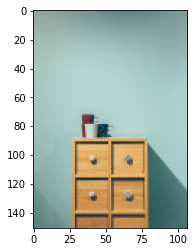

(151, 107, 3)


In [4]:
#### resize (비율은 유지하면서 픽셀수는 128*128 로)
scale_percent = (image.shape[0] * image.shape[1]) / (128*128) # percent of original size
width = int(image.shape[1] / np.sqrt(scale_percent))
height = int(image.shape[0] / np.sqrt(scale_percent))
dim = (width, height) #비율 유지 모드
#dim = (128,128) #정사각형 128*128 모드
image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #rgb mode
# image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) #hsv mode
# image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB) #lab mode

# show image
im_array = np.asarray(image)
plt.imshow(im_array)
plt.show()
print(image.shape)
image = image.reshape((image.shape[0] * image.shape[1], 3)) # height, width 통합

In [9]:
# shuffle pixels

In [ ]:
image2 = np.reshape(image, (-1, image.shape[2]))
print('gg',image2.shape)

np.random.shuffle(image2)
image2 = np.reshape(image2, image.shape)
plt.imshow(image2)
plt.show()

image = image2.reshape((image.shape[0] * image.shape[1], 3))
print('ggg',image.shape)

## demo

https://scikit-learn.org/stable/auto_examples/cluster/plot_mean_shift.html#sphx-glr-auto-examples-cluster-plot-mean-shift-py

### compute mean_shift

estimate bandwidth: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.estimate_bandwidth.html

In [5]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(image, quantile=0.1, n_samples=200) #128*128에 이 파라미터가 적절한듯(조정)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(image)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 12


### plot result (label)

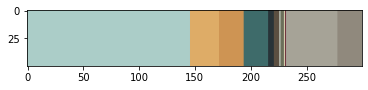

hsv 값과 빈도는 다음과 같다

[h 1 , s 1 , v 1 ] = [171, 16, 80] 0.4888283716036393
[h 2 , s 2 , v 2 ] = [34, 53, 87] 0.0846691836355759
[h 3 , s 3 , v 3 ] = [31, 59, 80] 0.07334282354397474
[h 4 , s 4 , v 4 ] = [178, 41, 41] 0.07359039425635948
[h 5 , s 5 , v 5 ] = [198, 28, 22] 0.017082379154546017
[h 6 , s 6 , v 6 ] = [32, 27, 35] 0.016834808442161293
[h 7 , s 7 , v 7 ] = [98, 5, 83] 0.0029089558705205176
[h 8 , s 8 , v 8 ] = [72, 18, 43] 0.01262610633162097
[h 9 , s 9 , v 9 ] = [46, 18, 84] 0.0031565265829052425
[h 10 , s 10 , v 10 ] = [350, 51, 44] 0.0025994924800396115
[h 11 , s 11 , v 11 ] = [46, 8, 65] 0.1515751686575478
[h 12 , s 12 , v 12 ] = [36, 12, 56] 0.07278578944110911


In [6]:
hist=centroid_histogram(ms)
bar = plot_colors(hist, cluster_centers)
plt.figure()
plt.axis("on")
plt.imshow(bar)
plt.show()

print("hsv 값과 빈도는 다음과 같다\n")
i=-1
for center in cluster_centers:
    i+=1
    h,s,v=revised_rgb_to_hsv(center[0],center[1],center[2])
    h=int(h)
    s=int(s)
    v=int(v)
    print("[""h",i+1,',',"s",i+1,',',"v",i+1,"]","=",[h,s,v], hist[i])
   

유사색의 명화 추천 : 
La Senna (On The Seine)
https://artvee.com/saconud/502697ld.jpg


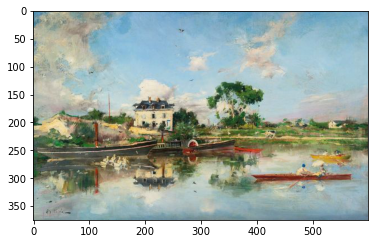

Surveyor’s Wagon in the Rockies (c.1859) 
https://artvee.com/saconud/500066ld.jpg


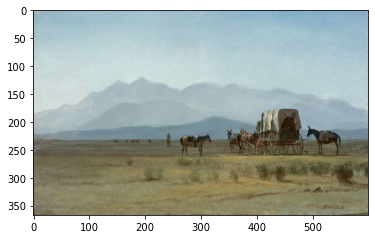

The head of a girl in a scarf (1937) 
https://artvee.com/saconud/101502ab.jpg


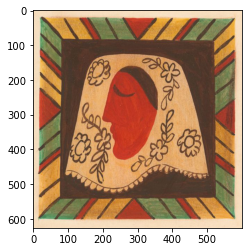

Prismes-5 (1931) 
https://artvee.com/saconud/101109ab.jpg


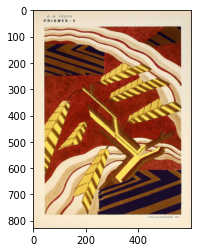

Save Serbia our ally (1918) 
https://artvee.com/saconud/10510po.jpg


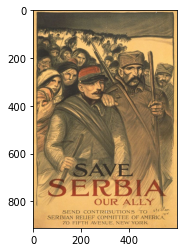

Terrot And Cie. Dijon Bicyclettes De Tourisme (c.1900) 
https://artvee.com/saconud/11059po.jpg


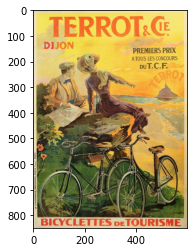

Head of Saint John the Evangelist
https://artvee.com/saconud/300581rg.jpg


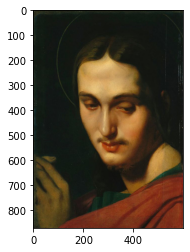

Music (ca. 1895) 
https://artvee.com/saconud/202951fg.jpg


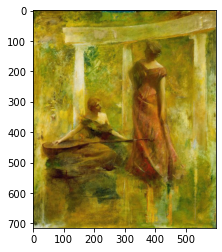

Leantika,=Riesen=Grand=Hottell, in Lion=See; Indien (1922) 
https://artvee.com/saconud/101827ab.jpg


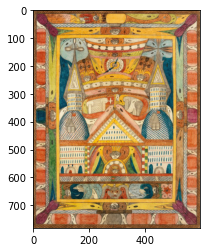

The head of a girl in a scarf (1937) 
https://artvee.com/saconud/101502ab.jpg


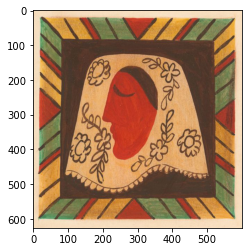

Faun and Nymph (1939 - 1941) 
https://artvee.com/saconud/101903ab.jpg


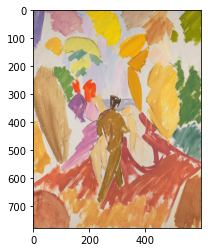

Grooming (Morning) (1931) 
https://artvee.com/saconud/101544ab.jpg


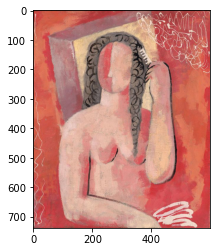

La Gomme (1900) 
https://artvee.com/saconud/11128po.jpg


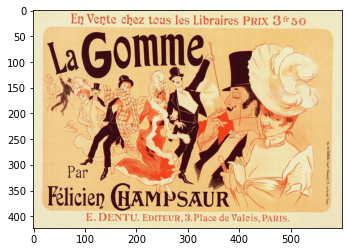

Harold Prince presents Zero Mostel in Fiddler on the roof (1964) 
https://artvee.com/saconud/12314po.jpg


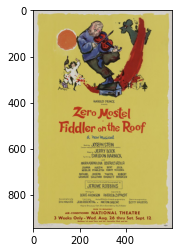

Reglisse Figaro (1894) 
https://artvee.com/saconud/10925po.jpg


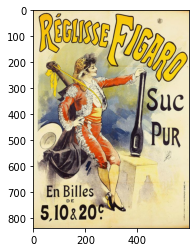

Librairie Ed.Sagot (1891) 
https://artvee.com/saconud/10899po.jpg


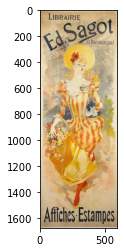

Ault and Wiborg, Ad. 069 (1890-1913) 
https://artvee.com/saconud/11310po.jpg


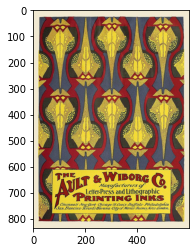

Yellow Elliot (1811) 
https://artvee.com/saconud/50326pl.jpg


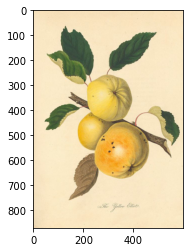

The Wild Apples of Middle Asia
https://artvee.com/saconud/50188pl.jpg
Deux Prunes Anglaises (1854-1896) 
https://artvee.com/saconud/50518pl.jpg


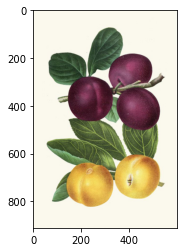

Dracaena Terminalis (1867-1870) 
https://artvee.com/saconud/50570pl.jpg


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import requests

df_analog=[]
df_compl=[]
df_mono=[]

for i in range(1,4): 
    for center in cluster_centers:

        h,s,v=revised_rgb_to_hsv(center[0],center[1],center[2])
        h=int(h)
        s=int(s)
        v=int(v)

        #비슷한 색감의 명화 추천
        ## roomcolor_analog(비슷한 색감) : h는 +-30도(!=0) (AND) s는동일 v는 +-5 

        #보색의 명화 추천
        ## roomcolor_compl(보색): h는 +-180도 (AND) s와v는 +-5

        #단색의 명화 추천
        ## roomcolor_mono(단색) : h는 동일 (AND) s는 +-10, v는 고려하지 않음

        roomcolor_analog= (abs(df['h'+str(i)]-h)>=0)&(abs(df['h'+str(i)]-h)<=30)&(abs(df['s'+str(i)]-s)<=5)&(abs(df['v'+str(i)]-v)<=5)
        roomcolor_compl=(abs(df['h'+str(i)]-h)==180)&(abs(df['s'+str(i)]-s)<=5)&(abs(df['v'+str(i)]-v)<=5)
        roomcolor_mono=(df['h'+str(i)]==h)&(abs(df['s'+str(i)]-s)<=10)

        df_analog.append(df[roomcolor_analog]['제목'].values)  #유사색-추천받은 명화 '제목' list형식으로 append
        df_compl.append(df[roomcolor_compl]['제목'].values)  #보색-추천받은 명화 '제목' list형식으로 append
        df_mono.append(df[roomcolor_mono]['제목'].values) #단색-추천받은 명화 '제목' list형식으로 append


print("유사색의 명화 추천 : ")
for i in range(0,3):
    for j in range(0,len(df_analog[i])):
        try:
            img_title = df_analog[i][j] 
            print(img_title)
            url = df.loc[df['제목']==img_title]['이미지url'].values[0]
            print(url)
            response = requests.get(url)
            image_bytes = io.BytesIO(response.content)
            img = Image.open(image_bytes)
            plt.imshow(img)
            plt.show()
        except:
            None

print("="*50)
'''
print("\n보색의 명화 추천 : ")
for i in range(0,3):
    for j in range(0,len(df_compl[i])):
        try:
            img_title = df_compl[i][j] 
            print(img_title)
            url = df.loc[df['제목']==img_title]['이미지url'].values[0]
            response = requests.get(url)
            image_bytes = io.BytesIO(response.content)
            img = Image.open(image_bytes)
            plt.imshow(img)
            plt.show()
        except:
            None
print("="*50)
            
print("\n단색의 명화 추천 : ")
for i in range(0,3):
    for j in range(0,len(df_mono[i])):
        try:
            img_title = df_mono[i][j] 
            print(img_title)
            url = df.loc[df['제목']==img_title]['이미지url'].values[0]
            response = requests.get(url)
            image_bytes = io.BytesIO(response.content)
            img = Image.open(image_bytes)
            plt.imshow(img)
            plt.show()
        except:
            None
'''
            

### plot result (3차원)

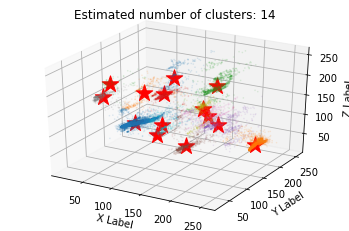

In [65]:
# Plot result
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from itertools import cycle

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    ax.scatter(image[my_members, 0], image[my_members, 1],image[my_members, 2], col + '.',s=0.5,alpha=0.1)
    
    ax.scatter(cluster_center[0], cluster_center[1], cluster_center[2],marker='*', s=300, c='r',alpha=1)

plt.title('Estimated number of clusters: %d' % n_clusters_)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

### plot result (2차원)

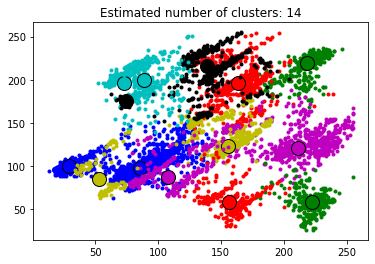

In [66]:
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(image[my_members, 0], image[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()